Looking at Spx returns after state of the union speeches

In [5]:
import pandas as pd
import numpy as np
import datetime as dt
import quandl
import matplotlib.pyplot as plt

plt.rcParams.update({"figure.figsize":(16, 9), "grid.alpha":0.21})
plt.style.use("seaborn-whitegrid")

Getting speech dates and Spx data

In [7]:
df = pd.read_html("https://en.wikipedia.org/wiki/State_of_the_Union")
df = df[3]
df = df.iloc[2:, :2]
df.columns = ["Date", "Name"]
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")
df.sort_index(ascending=True, inplace=True)
df.set_index(df["Date"], inplace=True)

spx = quandl.get("CHRIS/CME_SP1")
spx = spx.loc[dt.date(1993, 1, 1):]

Collecting returns for each speech & plotting

In [3]:
df_all = pd.DataFrame()

for i in df.index:
    rets = spx.loc[i-dt.timedelta(days=5):i+dt.timedelta(21)]
    #rets = rets.iloc[:21]
    rets.reset_index(inplace=True, drop=True)
    rets = rets["Settle"].pct_change()
    rets.iloc[0] = 0
    df_all[i] = rets

Text(17,-0.00484801,'voodoomarkets.wordpress.com')

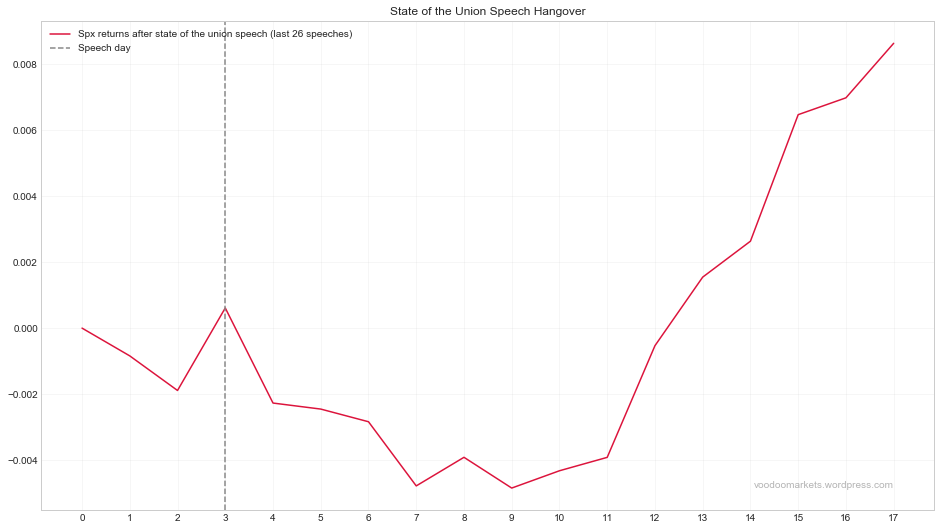

In [6]:
plt.plot(df_all.mean(axis=1).cumsum(), color="crimson", label="Spx returns after state of the union speech (last {} speeches)".format(len(df_all.columns)))
plt.axvline(3, 0, color="#888888", linestyle="--", label="Speech day")
plt.xticks(np.arange(0, len(df_all), 1))
plt.legend(loc="upper left")
plt.title("State of the Union Speech Hangover")
plt.text(len(df_all)-1, df_all.mean(axis=1).cumsum().min(), "voodoomarkets.wordpress.com", alpha=0.34, horizontalalignment="right")